In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:.1f}'.format

In [2]:
train = pd.read_csv('Parking_data/train.csv')
test = pd.read_csv('Parking_data/test.csv')

In [3]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.7,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.7,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.9,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.9,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.9,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [5]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [8]:
#임대보증금, 임대료 '-' 표시 변환 결측치로
train['임대보증금'] = train['임대보증금'].replace('-','').apply(pd.to_numeric)
train['임대료'] = train['임대료'].replace('-','').apply(pd.to_numeric)

In [9]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

## 상가, 아파트 구분지어서 데이터 다루기

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['임대건물구분'])
labels = encoder.transform(train['임대건물구분'])

In [11]:
train['임대건물구분'] = labels

In [12]:
encoder.classes_

array(['상가', '아파트'], dtype=object)

In [13]:
# 아파트 => 1, 상가 => 1
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,1,경상북도,국민임대,39.7,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,1,경상북도,국민임대,39.7,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,1,경상북도,국민임대,51.9,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,1,경상북도,국민임대,51.9,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,1,경상북도,국민임대,51.9,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


In [31]:
apartment = train[train['임대건물구분'] == 1]

In [32]:
store = train[train['임대건물구분'] < 1]

In [33]:
apartment.shape, store.shape

((2390, 15), (562, 15))

# 결측치 처리

## 임대보증금 결측값 처리

In [39]:
# 아파트

local_rent_mean = apartment.groupby('지역')['임대보증금'].mean()
local = list(local_rent_mean.index)
print(local_rent_mean.index)
print(local_rent_mean.values)

# 상가(????? 상가들은 임대료 임대보증금이 없음 여기에  아파트 평균을 넣는건 미친짓) 따라서 아파트
#local_rent_mean = train_store.groupby('지역')['임대보증금'].mean()
#local = list(local_rent_mean.index)
#print(local_rent_mean.index)
#print(local_rent_mean.values)

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')
[18005500.         32726694.04186796 21923533.08823529 19863428.57142857
 28588851.06382979 26995212.12121212 23559582.19178083 23786718.44660194
 87293234.375      46912765.95744681 27965250.         15928927.15231788
 19154669.72477064 17339196.96969697 19085356.09756098 22785411.04294479]


In [35]:
store.groupby('지역').count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
강원도,31,31,31,31,31,31,31,31,0,0,31,31,31,31
경상남도,97,97,97,97,97,97,97,97,0,0,97,97,97,97
대전광역시,113,113,113,113,113,113,113,113,0,0,62,113,113,113
부산광역시,220,220,220,220,220,220,220,220,0,0,220,220,220,220
제주특별자치도,25,25,25,25,25,25,25,25,0,0,25,25,25,25
충청남도,76,76,76,76,76,76,76,76,0,0,0,76,76,76


In [40]:
#아파트
dic_local_rent = {}
for i in zip(local, local_rent_mean.values):
    dic_local_rent[i[0]] = i[1]
print(dic_local_rent)

{'강원도': 18005500.0, '경기도': 32726694.041867957, '경상남도': 21923533.088235293, '경상북도': 19863428.57142857, '광주광역시': 28588851.063829787, '대구광역시': 26995212.121212117, '대전광역시': 23559582.19178083, '부산광역시': 23786718.44660194, '서울특별시': 87293234.375, '세종특별자치시': 46912765.957446806, '울산광역시': 27965250.0, '전라남도': 15928927.152317882, '전라북도': 19154669.724770643, '제주특별자치도': 17339196.96969697, '충청남도': 19085356.097560976, '충청북도': 22785411.042944785}


In [41]:
# 결측치 채우기
for local in dic_local_rent.keys():
    apartment.loc[apartment['지역'] == local, '임대보증금'] = apartment.loc[apartment['지역'] == local, '임대보증금'].fillna(dic_local_rent[local])

In [42]:
# 평균값으로 들어갔는지 확인 및 결측치 채워진거 확인
apartment.isna().sum(), print(local_rent_mean)

지역
강원도       18005500.0
경기도       32726694.0
경상남도      21923533.1
경상북도      19863428.6
광주광역시     28588851.1
대구광역시     26995212.1
대전광역시     23559582.2
부산광역시     23786718.4
서울특별시     87293234.4
세종특별자치시   46912766.0
울산광역시     27965250.0
전라남도      15928927.2
전라북도      19154669.7
제주특별자치도   17339197.0
충청남도      19085356.1
충청북도      22785411.0
Name: 임대보증금, dtype: float64


(단지코드                             0
 총세대수                             0
 임대건물구분                           0
 지역                               0
 공급유형                             0
 전용면적                             0
 전용면적별세대수                         0
 공가수                              0
 자격유형                             0
 임대보증금                            0
 임대료                             28
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    84
 도보 10분거리 내 버스정류장 수               4
 단지내주차면수                          0
 등록차량수                            0
 dtype: int64,
 None)

## 임대료 결측값 처리

In [43]:
local_fee_mean = apartment.groupby('지역')['임대료'].mean()
local = list(local_fee_mean.index)
print(local_fee_mean.index)
print(local_fee_mean.values)

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')
[183339.27631579 226381.88405797 165003.05147059 147809.32773109
 163677.73049645 263120.1010101  173557.80821918 200043.49514563
 430110.18181818 492170.21276596 219009.16666667 132250.
 134853.30275229 158130.45454545 120378.29268293 163466.87116564]


In [44]:
dic_local_fee = {}
for i in zip(local, local_fee_mean.values):
    dic_local_fee[i[0]] = i[1]
print(dic_local_fee)

{'강원도': 183339.27631578947, '경기도': 226381.884057971, '경상남도': 165003.05147058822, '경상북도': 147809.32773109243, '광주광역시': 163677.7304964539, '대구광역시': 263120.10101010103, '대전광역시': 173557.80821917808, '부산광역시': 200043.49514563108, '서울특별시': 430110.1818181818, '세종특별자치시': 492170.21276595746, '울산광역시': 219009.16666666666, '전라남도': 132250.0, '전라북도': 134853.3027522936, '제주특별자치도': 158130.45454545456, '충청남도': 120378.29268292683, '충청북도': 163466.87116564417}


In [45]:
# 결측치 채우기
for local in dic_local_fee.keys():
    apartment.loc[apartment['지역'] == local, '임대료'] = apartment.loc[apartment['지역'] == local, '임대료'].fillna(dic_local_fee[local])

In [46]:
# 평균값으로 들어갔는지 확인 및 결측치 채워진거 확인
apartment.isna().sum(), print(local_fee_mean)

지역
강원도       183339.3
경기도       226381.9
경상남도      165003.1
경상북도      147809.3
광주광역시     163677.7
대구광역시     263120.1
대전광역시     173557.8
부산광역시     200043.5
서울특별시     430110.2
세종특별자치시   492170.2
울산광역시     219009.2
전라남도      132250.0
전라북도      134853.3
제주특별자치도   158130.5
충청남도      120378.3
충청북도      163466.9
Name: 임대료, dtype: float64


(단지코드                             0
 총세대수                             0
 임대건물구분                           0
 지역                               0
 공급유형                             0
 전용면적                             0
 전용면적별세대수                         0
 공가수                              0
 자격유형                             0
 임대보증금                            0
 임대료                              0
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    84
 도보 10분거리 내 버스정류장 수               4
 단지내주차면수                          0
 등록차량수                            0
 dtype: int64,
 None)

<AxesSubplot:>

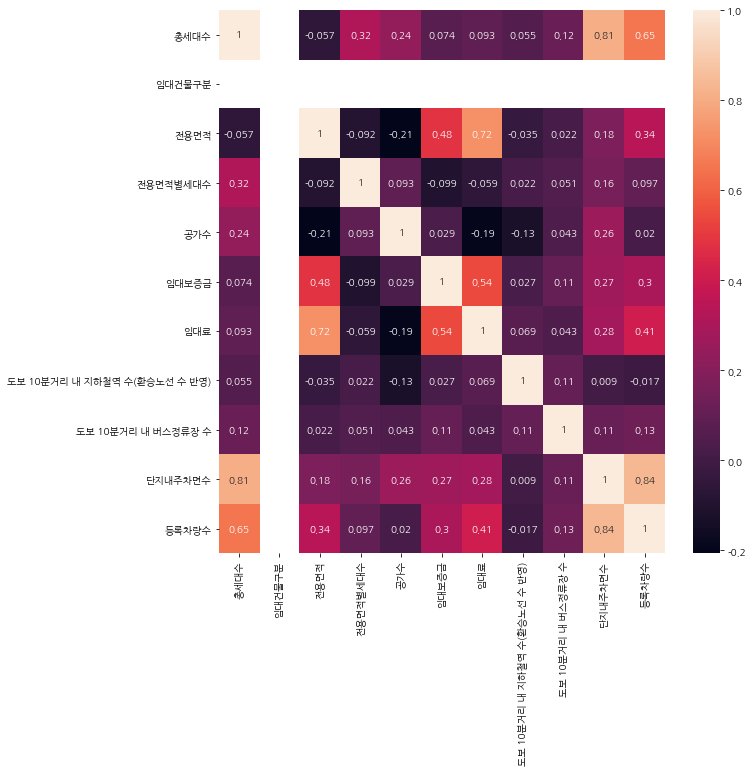

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(apartment.corr(), annot=True)

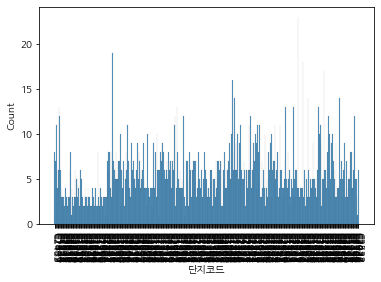

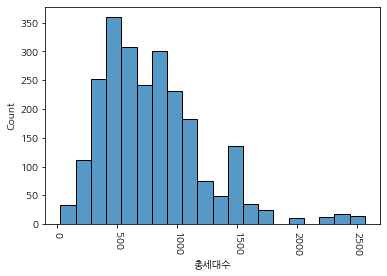

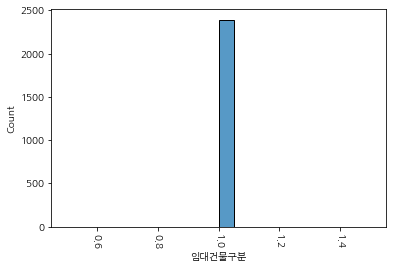

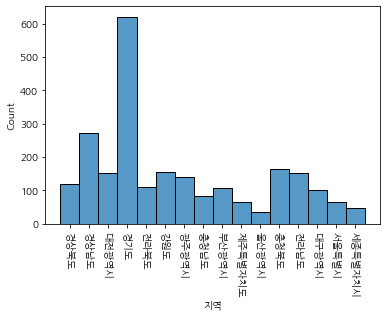

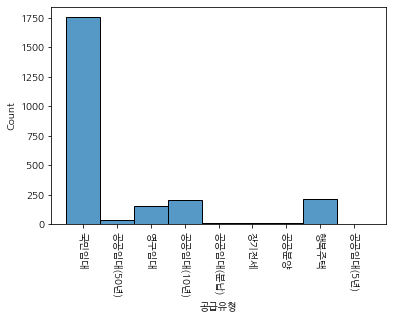

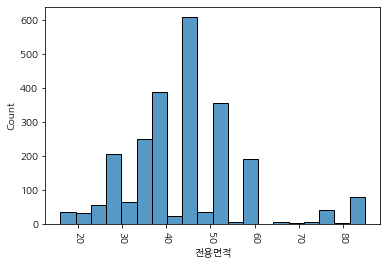

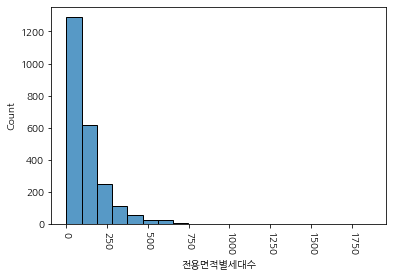

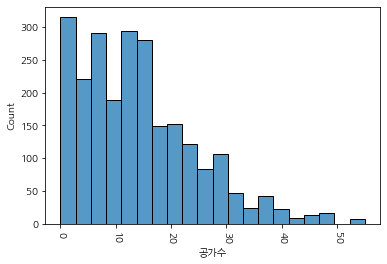

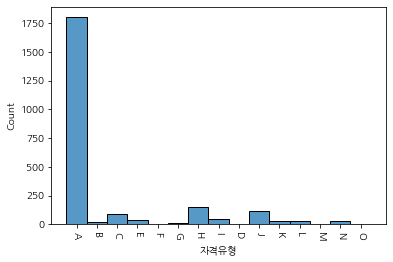

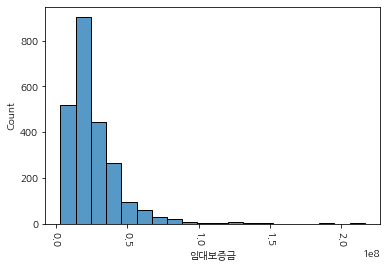

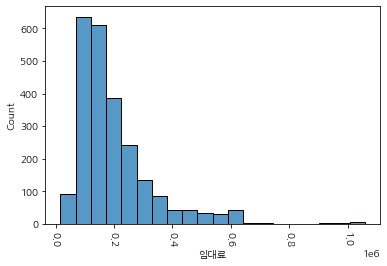

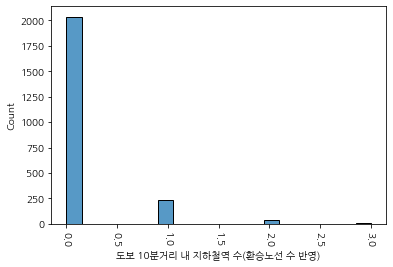

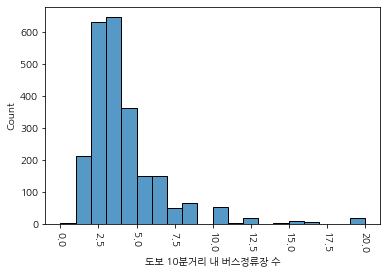

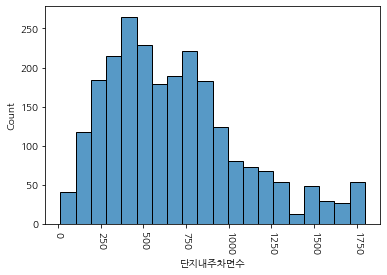

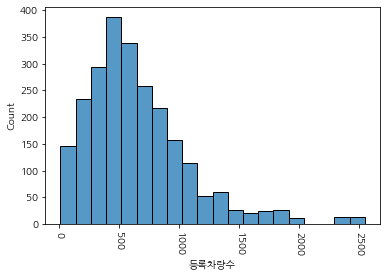

In [48]:
for column in apartment.columns:
    sns.histplot(data= apartment, x = apartment[column], bins=20)
    plt.xticks(rotation = 270)
    plt.show()

In [49]:
apartment.describe()

,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2390.0,2390.0,2390.0,2390.0,2390.0,2390.0,2390.0,2306.0,2386.0,2390.0,2390.0
mean,801.8,1.0,44.6,126.7,14.2,26833538.3,196608.8,0.1,3.7,680.2,654.2
std,432.7,0.0,13.3,136.8,10.5,21532021.8,130429.7,0.4,2.7,392.8,427.3
min,26.0,1.0,16.0,2.0,0.0,3056000.0,16650.0,0.0,0.0,13.0,13.0
25%,492.0,1.0,36.6,38.0,7.0,14418000.0,111090.0,0.0,2.0,385.0,358.0
50%,749.0,1.0,46.6,88.0,13.0,21019500.0,162120.0,0.0,3.0,629.0,568.0
75%,1013.0,1.0,51.9,167.8,21.0,32443000.0,237697.5,0.0,4.0,891.0,831.0
max,2568.0,1.0,85.0,1865.0,55.0,216423000.0,1058030.0,3.0,20.0,1798.0,2550.0
